<a href="https://colab.research.google.com/github/nikhilsinghh59/SHALA2020/blob/master/Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

In [0]:
# !git clone https://github.com/shala2020/shala2020.github.io

In [2]:
!wget https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv

!wget https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv

--2020-04-19 13:06:39--  https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158678 (155K) [text/plain]
Saving to: ‘moviesData.csv’

moviesData.csv      100%[===================>] 154.96K  --.-KB/s    in 0.04s   

2020-04-19 13:06:39 (4.11 MB/s) - ‘moviesData.csv’ saved [158678/158678]

--2020-04-19 13:06:45--  https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443..

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [3]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv('/content/train.csv')
movies = pd.read_csv('/content/moviesData.csv')

In [5]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [6]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'].head()

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [7]:
# Find the details of MonthlyRate 
df['MonthlyRate'].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [8]:
# Check for missing values 
df.isnull().sum()

# Drop the missing values 
df.drop(df.isnull() , axis=1)

# Print the size of df after dropping 
print(df.shape)


(1028, 34)


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df['MonthlyRateNew'] = (df['MonthlyRate'] - df['MonthlyRate'].mean())/df['MonthlyRate'].std()


# movies = pd.read_csv('/content/moviesData.csv')
# print(movies.shape)

In [0]:
movies = pd.read_csv('/content/moviesData.csv')

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [11]:
# Check for missing values 
print(movies.isnull().sum())

# Drop the missing values 
movies_drop = movies.dropna(axis=0 , inplace = False)
print(movies_drop.shape)

#print(movies.shape)

# Replace the missing values 
# You can use SimpleImputer of sklearn for this

missing_col = ['runtime' , 'dvd_rel_year' , 'dvd_rel_month', 'dvd_rel_day']

#print(missing_col)

new_movies = pd.DataFrame(columns = missing_col)

for col in  missing_col:
  new_movies[col] = movies[col]

movies.dropna(axis=1 , inplace=True)

# print(new_movies.head())
# print(movies.shape)

from sklearn.impute import SimpleImputer

sp = SimpleImputer()

imp_movies = pd.DataFrame(sp.fit_transform(new_movies))

imp_movies.columns = missing_col

for col in missing_col:
  movies[col] = imp_movies[col]

movies.head()

#print(movies.isnull().sum())

# for col in movies.columns:
#   if(movies[col].isnull().any()):
#     imp_col = pd.DataFrame(sp.fit_transform(movies[col]))

# # imp_movies = pd.DataFrame(sp.fit_transform(movies))

# # imp_movies.columns = movies.columns

# imp_movies.head()



Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64
(572, 31)


,Unnamed: 0,title,title_type,genre,mpaa_rating,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,runtime,dvd_rel_year,dvd_rel_month,dvd_rel_day
0,1,Filly Brown,Feature Film,Drama,R,2013,4,19,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,80.0,2013.0,7.0,30.0
1,2,The Dish,Feature Film,Drama,PG-13,2001,3,14,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,101.0,2001.0,8.0,28.0
2,3,Waiting for Guffman,Feature Film,Comedy,R,1996,8,21,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,84.0,2001.0,8.0,21.0
3,4,The Age of Innocence,Feature Film,Drama,PG,1993,10,1,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,139.0,2001.0,11.0,6.0
4,5,Malevolence,Feature Film,Horror,R,2004,9,10,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,90.0,2005.0,4.0,19.0


In [0]:
#imp_movies.head()

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

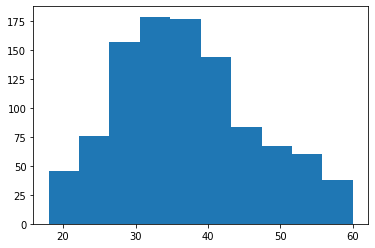

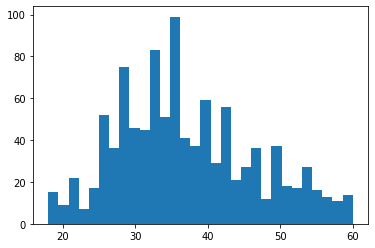

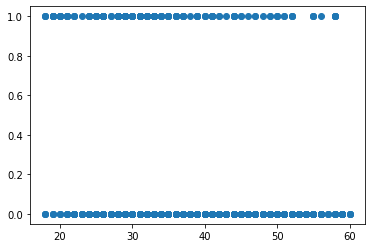

In [13]:
# Plot and modify the histogram of Age
plt.hist(df['Age'])
plt.show()
plt.hist(df['Age'] , bins = 30)
plt.show()

# Draw a scatter plot between Age and Attrition
plt.scatter( df['Age'] , df['Attrition'])
plt.show()



### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

[1 0]


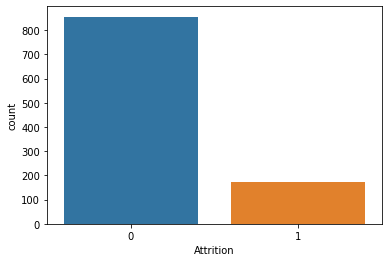

In [14]:
# Get a series of counts of values of Attrition
att_unique = df.Attrition.unique()
print(att_unique)

# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 

sns.countplot(x = df['Attrition'])
plt.show()



### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

In [0]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 

bus = df['BusinessTravel'].unique()


### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

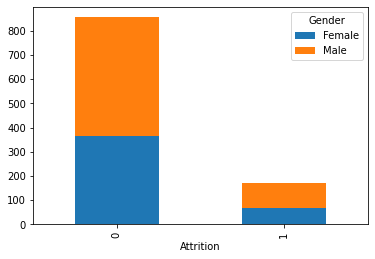

In [16]:
# Draw a stacked bar chart between Attrition and Gender 
ag =  pd.crosstab(df.Attrition , df.Gender)

ag.plot.bar(stacked=True)

plt.legend(title='Gender')
plt.show()


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

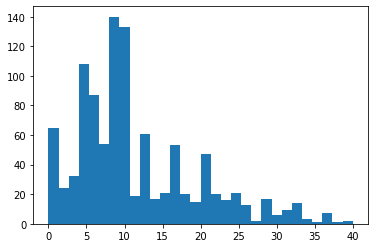

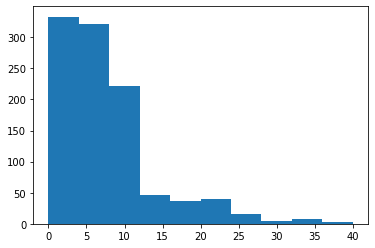

In [17]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df.TotalWorkingYears , bins = 30)
plt.show()

# Draw a histogram of YearsAtCompany
plt.hist(df.YearsAtCompany)
plt.show()

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


[Text(0, 0, 'Sales'),
 Text(0, 0, 'Research & Development'),
 Text(0, 0, 'Human Resources')]

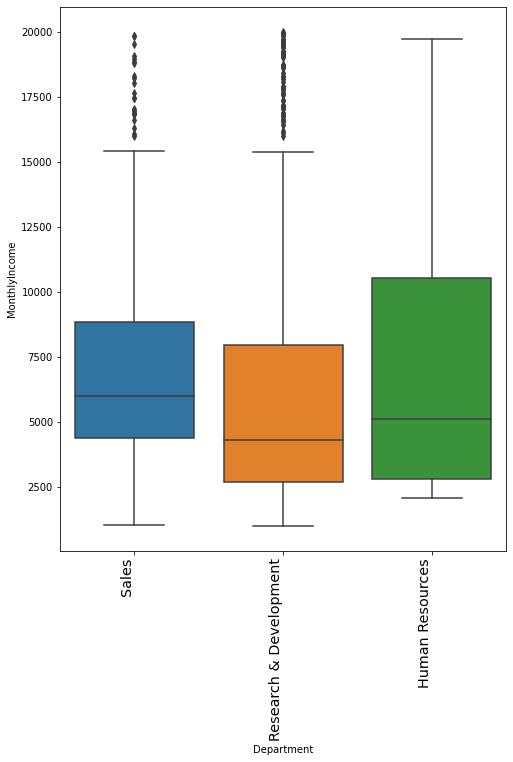

In [19]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 

plt.figure(figsize=(8,10))
#movies['diff'] = movies['audience_score'] - movies['critics_score']
chart = sns.boxplot('Department', 'MonthlyIncome', data=df)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

# Sales and research dev have outliers while Human resources doesn't

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


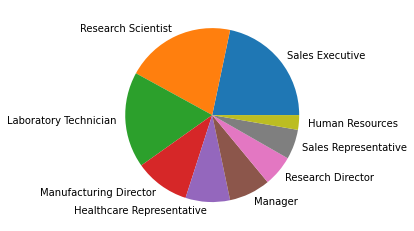

In [24]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 

job_count = df.JobRole.value_counts()
print(job_count)

plt.pie(job_count , labels = job_count.index.to_list())
plt.show()

